In [1]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### All CSV merging into one DF

In [2]:
path = r'D:\DA\Technocolabs Intern\S&P500 Stocks\S&P500 Stocks\individual_stocks_5yr\individual_stocks_5yr'

all_files = glob.glob(os.path.join(path, "*.csv"))

stock_csv = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [3]:
stock_csv.head(3)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL


In [4]:
stock_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


### Stock CSV files data cleaning

In [5]:
stock_csv.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [6]:
stock_csv = stock_csv.dropna()
stock_csv.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

### Converting date to proper data type

In [7]:
stock_csv['date'] = pd.to_datetime(stock_csv['date'])

In [9]:
stock_copy = stock_csv.copy()

In [12]:
stock_copy.set_index('date', inplace=True)

In [13]:
stock_copy.head(3)

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL


In [14]:
stock_csv.head(3)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL


In [26]:
company_names = stock_copy.groupby('Name')

In [27]:
company_names.groups.keys()

dict_keys(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC', 'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBT', 'BBY', 'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH', 'CAT', 'CB', 'CBG', 'CBOE', 'CBS', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN', 'CF', 'CFG', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS',

In [28]:
AAPL = company_names.get_group('AAPL')
GOOG = company_names.get_group('GOOG')
MSFT = company_names.get_group('MSFT')
AMZN = company_names.get_group('AMZN')

In [64]:
max_c = stock_copy['close'].max()
datetime = stock_csv[stock_csv['close'] == stock_csv['close'].max()]['date'].values

array(['2017-08-08T00:00:00.000000000'], dtype='datetime64[ns]')

In [30]:
company_list = [AAPL, GOOG, MSFT, AMZN]

In [34]:
tech_list = ['Apple', 'Google', 'Microsoft', 'Amazon']

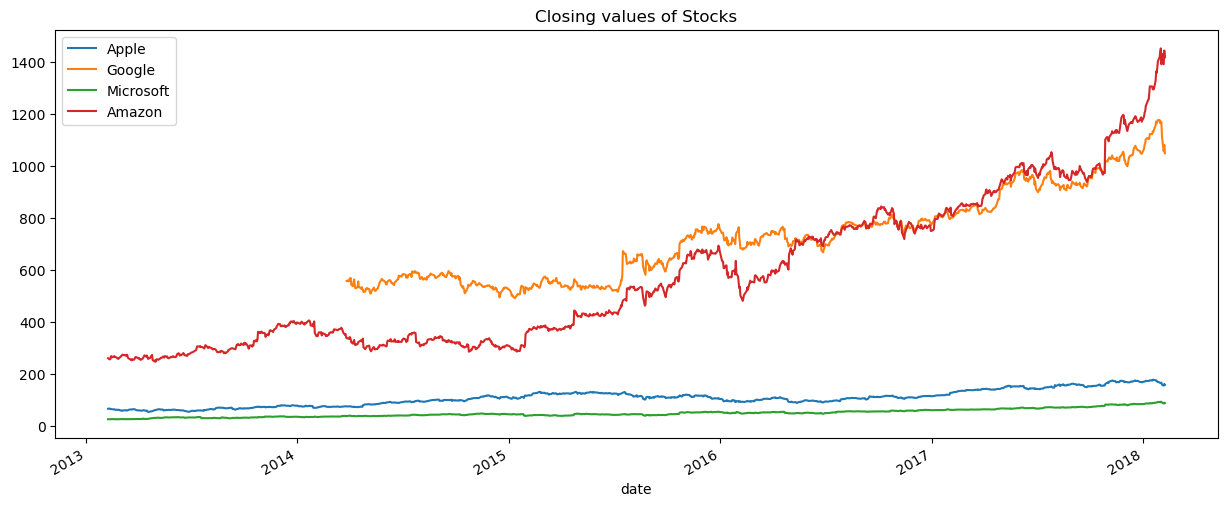

In [72]:
AAPL['close'].plot(label='Apple', figsize=(15,6))
GOOG['close'].plot( label='Google')
MSFT['close'].plot( label='Microsoft')
AMZN['close'].plot( label='Amazon')
plt.title('Closing values of Stocks')
plt.legend()
plt.show()

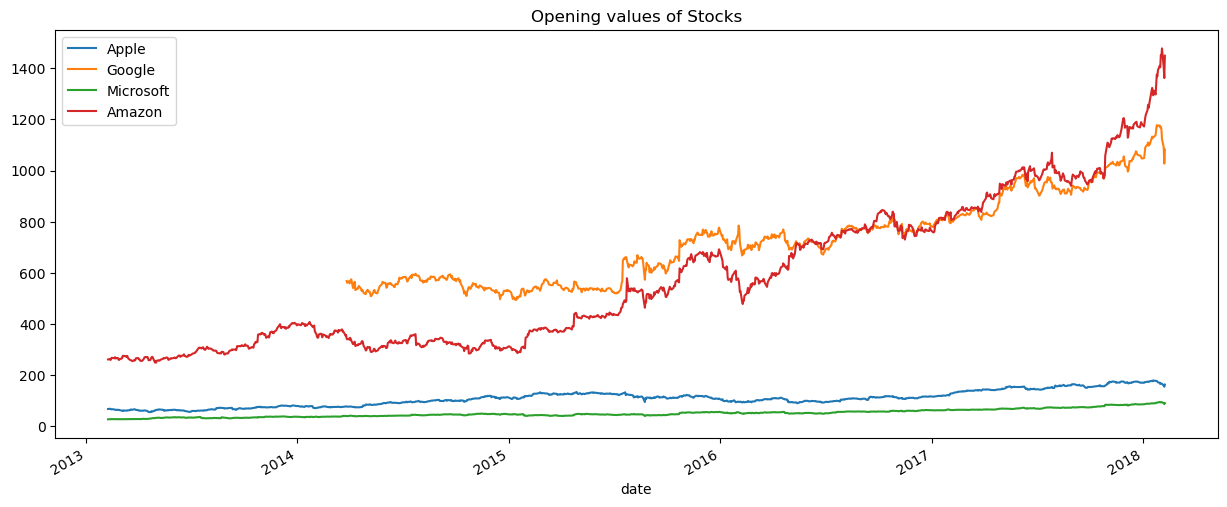

In [78]:
AAPL['open'].plot(label='Apple', figsize=(15,6))
GOOG['open'].plot( label='Google')
MSFT['open'].plot( label='Microsoft')
AMZN['open'].plot( label='Amazon')
plt.title('Opening values of Stocks')
plt.legend()
plt.show()

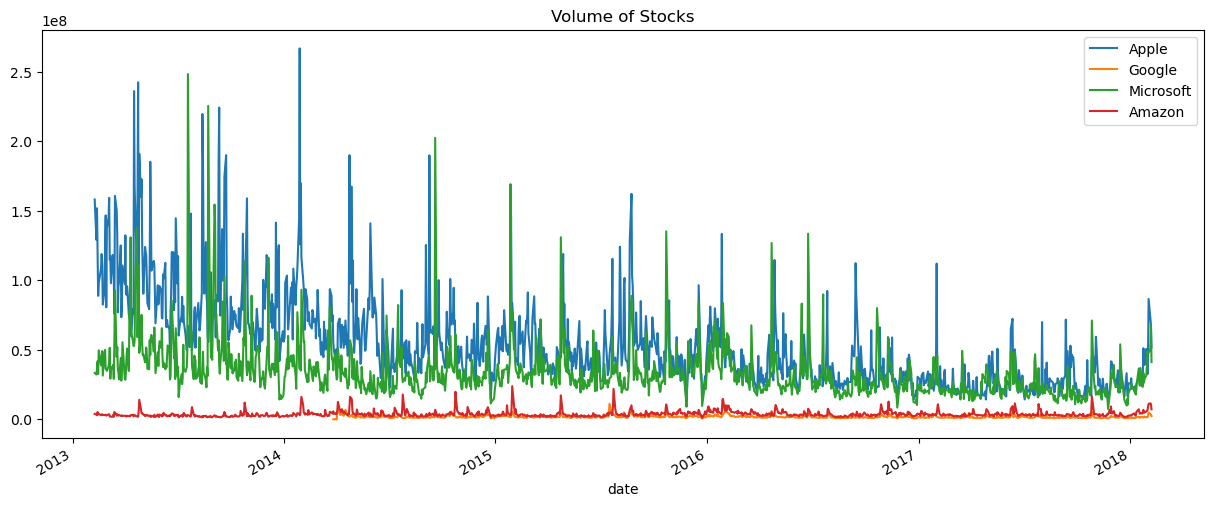

In [80]:
AAPL['volume'].plot(label='Apple', figsize=(15,6))
GOOG['volume'].plot( label='Google')
MSFT['volume'].plot( label='Microsoft')
AMZN['volume'].plot( label='Amazon')
plt.title('Volume of Stocks')
plt.legend()
plt.show()

In [82]:
import mplfinance as mpf

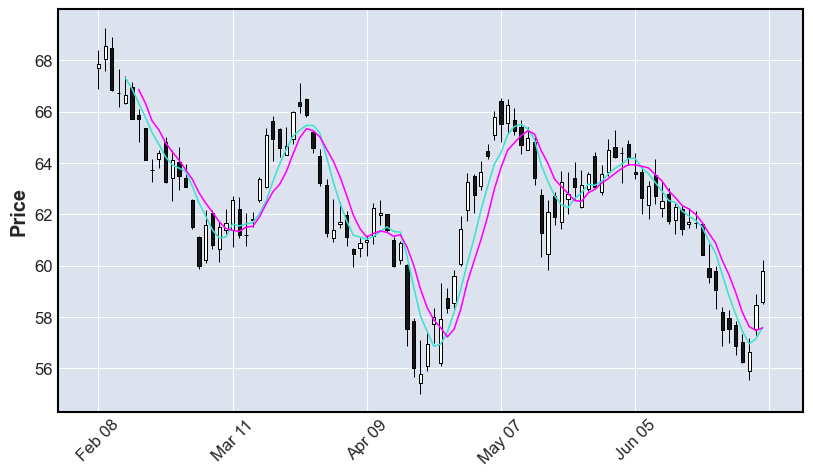

In [87]:
mpf.plot(AAPL.iloc[:100, :], type='candle', mav=(5,7), figratio=(9,5))